# Proyek Analisis Data: Nama dataset
- Nama: Louis Widi Anandaputra
- Email: louizzzwidi@gmail.com
- Id Dicoding: louis_widi

## Menentukan Pertanyaan Bisnis
- Apa saja faktor yang mempengaruhi PM2.5 dan PM10?
- Bagaimana waktu mempengaruhi tren kualitas udara?
- Kondisi apa saja yang akan terdapat pada kualitas udara terbaik?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [2]:
df1=pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2=pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df3=pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
df4=pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df5=pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df6=pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
df7=pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df8=pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9=pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
df10=pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
df11=pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')
df12=pd.read_csv('data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
df=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)
df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

### Data Assessment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


#### Mengecek Duplikasi

In [5]:
df.duplicated().sum()

0

#### Mengecek nilai hilang

##### Nullity pada seluruh data stasiun

In [6]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

##### Nullity pada setiap stasiun

In [7]:
# Group the DataFrame by 'station' and count missing values for each column
missing_values_by_station = df.groupby('station').apply(lambda x: x.isna().sum())

# Rename the columns for clarity
missing_values_by_station.columns = [f'missing_{col}_count' for col in df.columns]

# Reset the index to have 'station' as a column
missing_values_by_station.reset_index(inplace=True)
missing_values_by_station

station  missing_No_count  missing_year_count  missing_month_count  \
0    Aotizhongxin                 0                   0                    0   
1       Changping                 0                   0                    0   
2        Dingling                 0                   0                    0   
3          Dongsi                 0                   0                    0   
4        Guanyuan                 0                   0                    0   
5         Gucheng                 0                   0                    0   
6         Huairou                 0                   0                    0   
7    Nongzhanguan                 0                   0                    0   
8          Shunyi                 0                   0                    0   
9         Tiantan                 0                   0                    0   
10         Wanliu                 0                   0                    0   
11  Wanshouxigong                 0                   0                    0   

    missing_day_count  missing_hour_count  missing_PM2.5_count  \
0                   0                   0                  925   
1                   0                   0                  774   
2                   0                   0                  779   
3                   0                   0                  750   
4                   0                   0                  616   
5                   0                   0                  646   
6                   0                   0                  953   
7                   0                   0                  628   
8                   0                   0                  913   
9                   0                   0                  677   
10                  0                   0                  382   
11                  0                   0                  696   

    missing_PM10_count  missing_SO2_count  missing_NO2_count  \
0                  718                935               1023   
1                  582                628                667   
2                  656                730               1234   
3                  553                663               1601   
4                  429                474                659   
5                  381                507                668   
6                  777                980               1639   
7                  440                446                692   
8                  548               1296               1365   
9                  597               1118                744   
10                 284                575               1070   
11                 484                669                754   

    missing_CO_count  missing_O3_count  missing_TEMP_count  \
0               1776              1719                  20   
1               1521               604                  53   
2               2012              1214                  53   
3               3197               664                  20   
4               1753              1173                  20   
5               1401               729                  51   
6               1422              1151                  51   
7               1206               506                  20   
8               2178              1489                  51   
9               1126               843                  20   
10              1812              2107                  20   
11              1297              1078                  19   

    missing_PRES_count  missing_DEWP_count  missing_RAIN_count  \
0                   20                  20                  20   
1                   50                  53                  51   
2                   50                  53                  51   
3                   20                  20                  20   
4                   20                  20                  20   
5                   50                  51                  43   
6       

#### Mengecek distribusi dan outlier


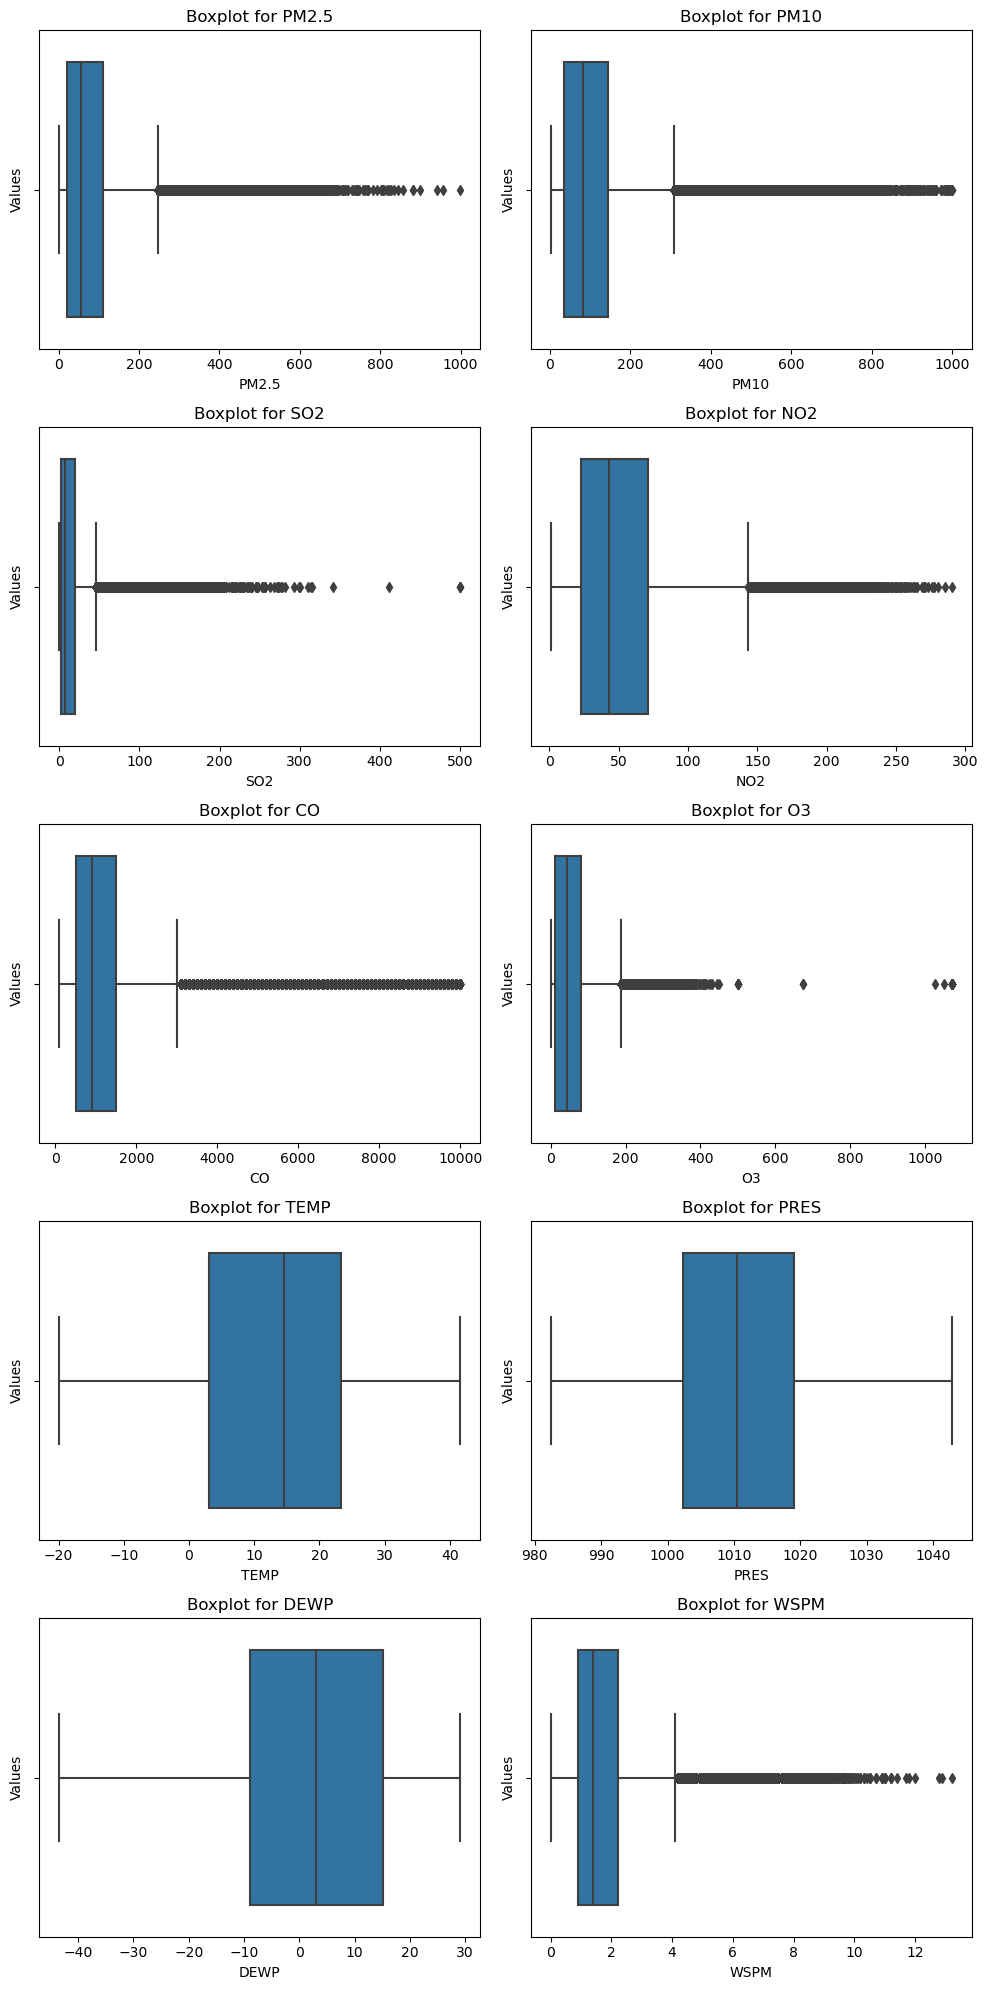

In [8]:
# Define the columns for the histograms
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'] #based on the high difference between mean and median

# Create a 2x2 grid of subplots for boxplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))  # Adjust the figure size as needed

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through the selected columns and create boxplots in each subplot
for i, column in enumerate(columns):
    sns.boxplot(data=df,x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<AxesSubplot: xlabel='wd', ylabel='count'>

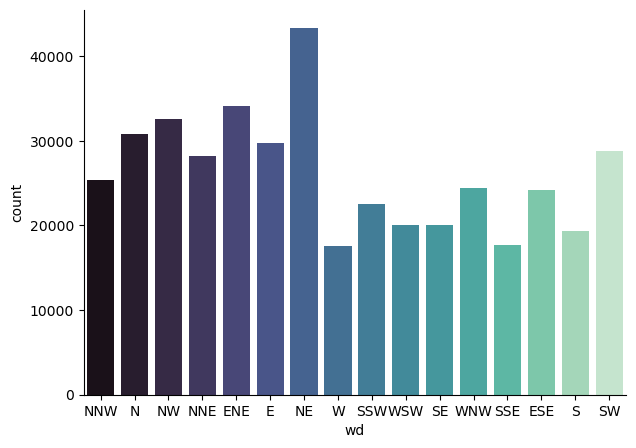

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.countplot(x='wd', data=df, palette='mako')

### Data Cleaning

#### Imputasi Nilai Kosong

In [10]:
#Median

# Group by 'station' and calculate the median for each column
grouped_df = df.groupby('station')

# Define a function to fill missing values with median
def fill_missing_with_station_median(group):
    return group.fillna(group.median())

# Use the transform function to fill missing values within each station
df = grouped_df.apply(fill_missing_with_station_median)


/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/4066022039.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return group.fillna(group.median())
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/4066022039.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = grouped_df.apply(fill_missing_with_station_median)


In [11]:
df['wd'].fillna('unknown',inplace=True)

In [12]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Menghilangkan Outliers

In [13]:
stations = df['station'].unique()

# Create an empty DataFrame to store the results
filtered_df = pd.DataFrame()


# Iterate through each city and apply outlier removal to each group
for station in stations:
    group = df[df['station'] == station]  # Filter data for the current city
    numeric_columns = group.select_dtypes(include='number').columns  # Select only numeric columns
    
    # Exclude specific columns ('no', 'year', 'month', 'hour') from outlier removal
    columns_to_exclude = ['No', 'year', 'month', 'hour']
    numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

    for column in numeric_columns:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1

        maximum = Q3 + (5 * IQR)
        minimum = Q1 - (5 * IQR)

        kondisi_lower_than = group[column] < minimum
        kondisi_more_than = group[column] > maximum

        group.drop(group[kondisi_lower_than].index, inplace=True)
        group.drop(group[kondisi_more_than].index, inplace=True)
    
    filtered_df = pd.concat([filtered_df, group], ignore_index=True)

# filtered_df now contains your original data with outliers removed for numeric columns (excluding 'no', 'year', 'month', 'hour') grouped by city
filtered_df

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/104117318.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group[kondisi_lower_than].index, inplace=True)
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/104117318.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group[kondisi_more_than].index, inplace=True)


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
395816  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
395817  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
395818  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
395819  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
395820  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
395816  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
395817  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
395818  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
395819  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
395820   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[395821 rows x 18 columns]

#### Verifikasi distribusi

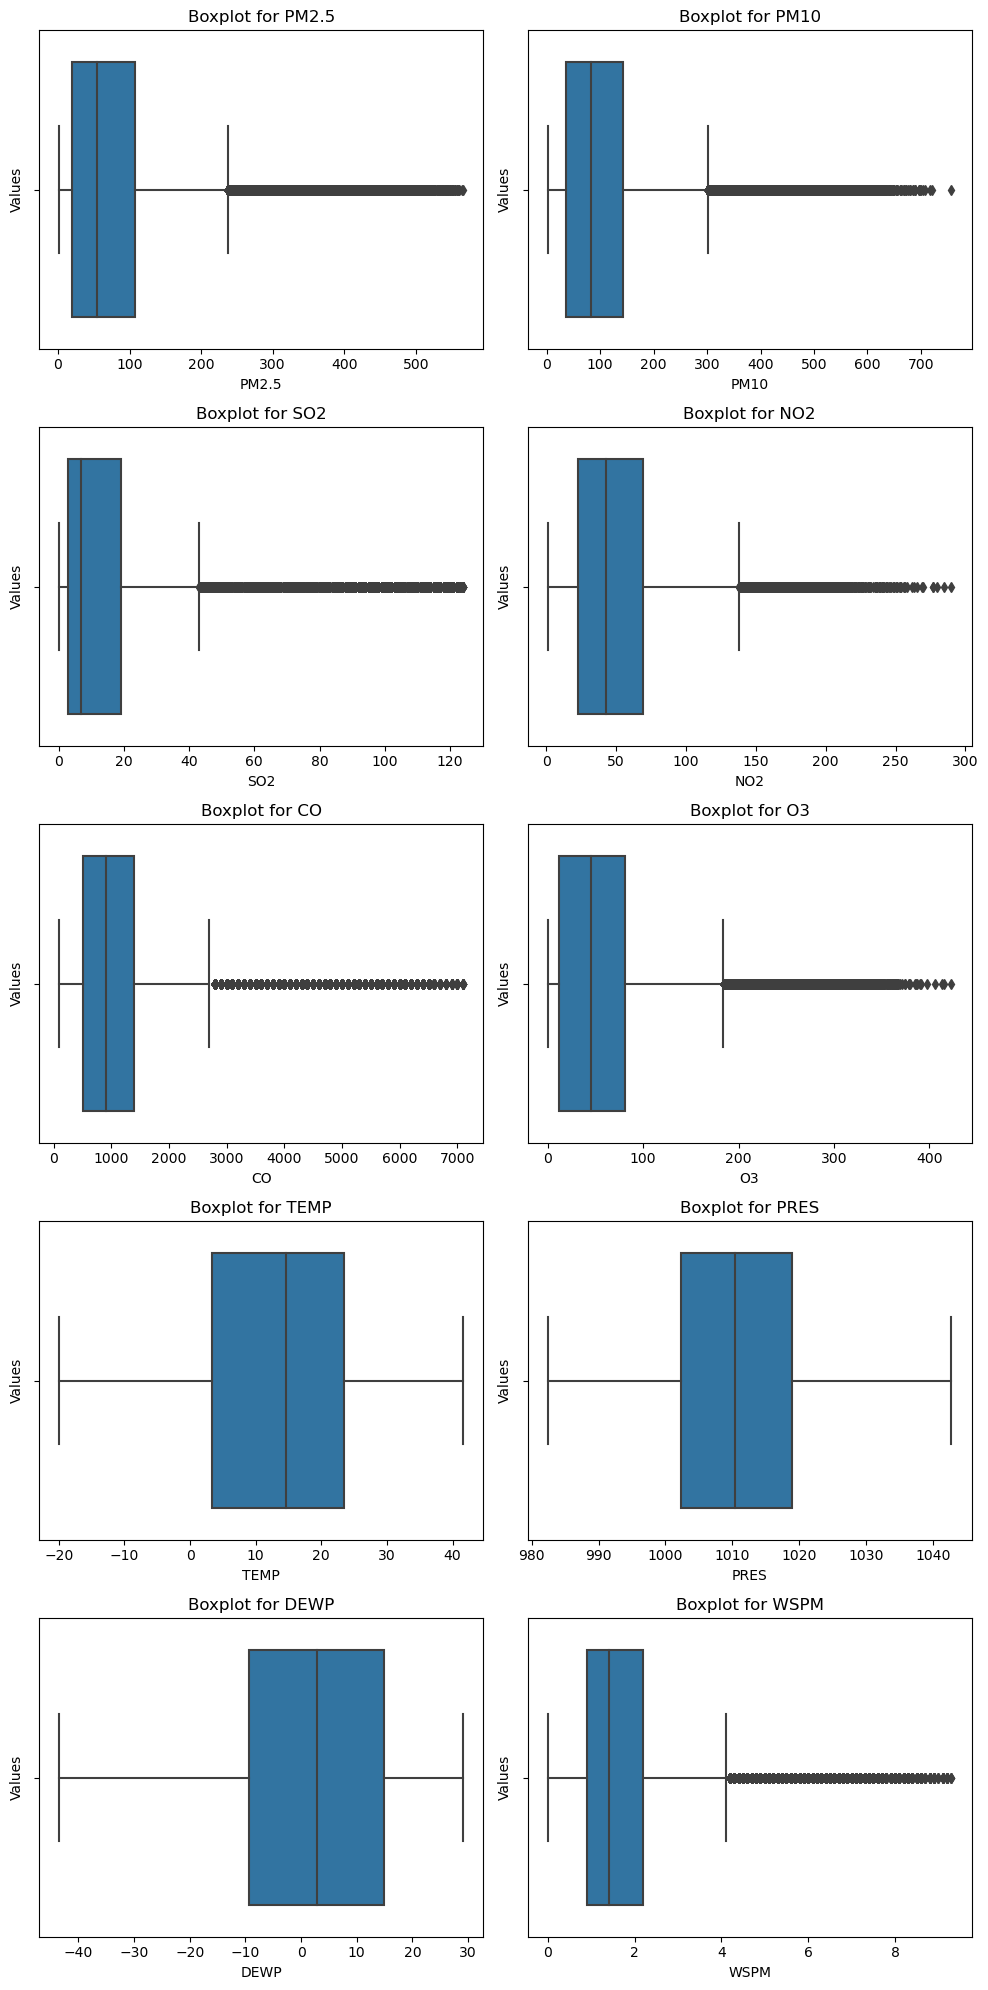

In [14]:
# Define the columns for the histograms
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'] #based on the high difference between mean and median

# Create a 2x2 grid of subplots for boxplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))  # Adjust the figure size as needed

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through the selected columns and create boxplots in each subplot
for i, column in enumerate(columns):
    sns.boxplot(data=filtered_df,x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
filtered_df['WSPM'].max()

9.3

## Exploratory Data Analysis
Melalui fakta bahwa kualitas udara dapat diukur dari tingkat partikulatnya, terutama untuk partikel yang berukuran di bawah 10 milimeter (mm), maka pengerjaan projek ini akan mengeksplorasi kedalaman informasi yang terkandung dalam kualitas udara PM10 dan PM2.5. Seiring dengan pengumpulan dan pembersihan data, ada beberapa pertanyaan yang muncul yang diharapkan dapat dijawab oleh EDA ini.

### Univariate Analysis

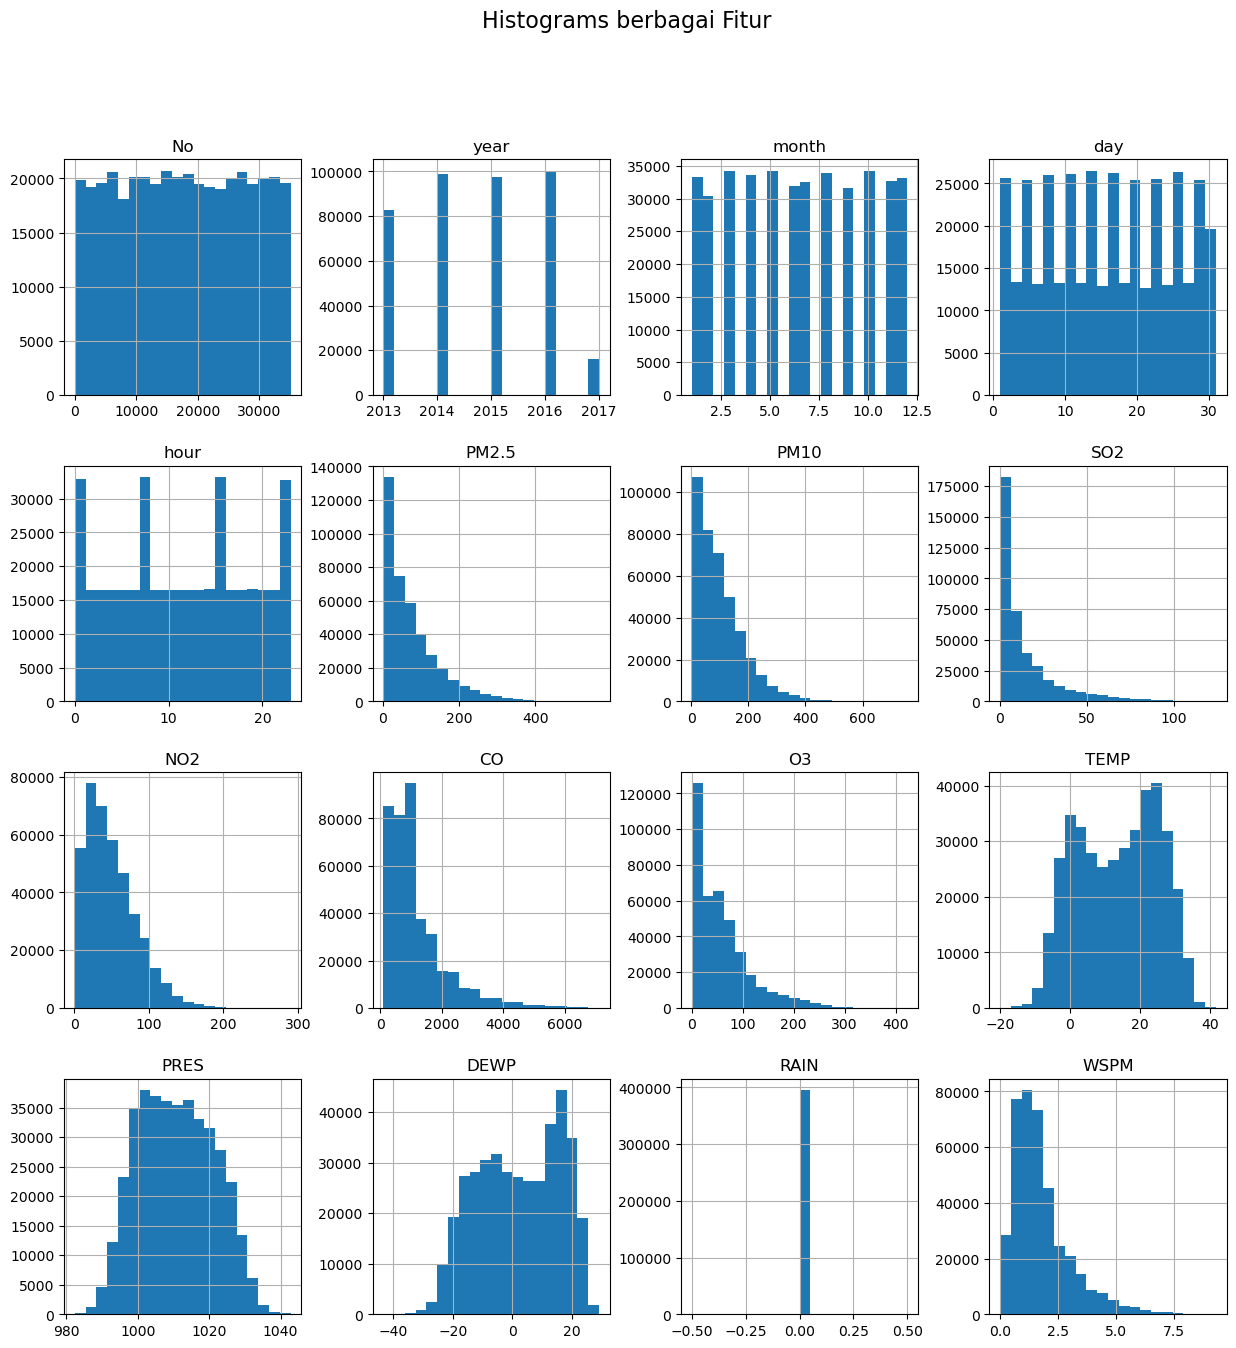

In [16]:
filtered_df.hist(bins=20, figsize=(15, 15))  
plt.suptitle('Histograms berbagai Fitur', fontsize=16)
plt.show()

Sebagian besar distribusi parameter kualitas udara termasuk PM10 dan PM2.5 mengikuti pola skew pada nilai yang lebih rendah. 

In [17]:
filtered_df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', 'unknown'], dtype=object)

Text(0.5, 1.0, 'Barplot of Wind Direction')

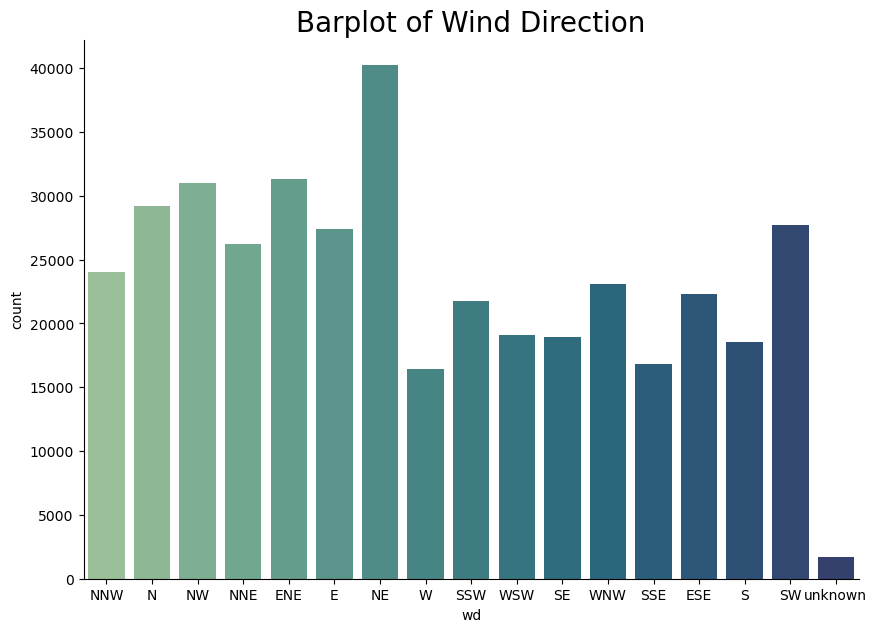

In [18]:
f, ax = plt.subplots(figsize=(10, 7))
sns.despine(f)
sns.countplot(x='wd', data=filtered_df, palette='crest',ax=ax)
ax.set_title('Barplot of Wind Direction', size=20)

## Multivariate Analysis

In [19]:
correlation_matrix = filtered_df.corr()

fig = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(
    title="Correlation Heatmap of Dataset",
    xaxis=dict(title="Features"),
    yaxis=dict(title="Features"),
)

# Updating Size of Heatmap
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

# Add correlation values to the heatmap
annotations = []
for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        annotations.append(dict(text=f"{correlation_matrix.iloc[i, j]:.2f}",
                                x=col, y=row,
                                xref='x1', yref='y1',
                                showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/3935111639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


In [20]:
# PM2.5
df_without_PM10 = pd.DataFrame(filtered_df.drop(columns=['PM10']))

# Calculate the correlation matrix
correlation_matrix_pm25 = df_without_PM10.corr()

# Find the most correlated columns to 'a' (excluding 'b')
most_correlated_pm25 = correlation_matrix_pm25['PM2.5'].sort_values(ascending=False)[1:6]

# Find the least correlated columns to 'a' (excluding 'b')
least_correlated_pm25 = correlation_matrix_pm25['PM2.5'].sort_values()[0:5]

# PM10
df_without_PM25 = pd.DataFrame(filtered_df.drop(columns=['PM2.5']))

# Calculate the correlation matrix
correlation_matrix_pm10 =df_without_PM25.corr()

# Find the most correlated columns to 'a' (excluding 'b')
most_correlated_pm10 = correlation_matrix_pm10['PM10'].sort_values(ascending=False)[1:6]

# Find the least correlated columns to 'a' (excluding 'b')
least_correlated_pm10 = correlation_matrix_pm10['PM10'].sort_values()[0:5]


print("5 most positively correlated columns to 'PM2.5' (excluding 'PM10'):")
print(most_correlated_pm25)

print("\n5 most negatively correlated columns to 'PM2.5' (excluding 'PM10'):")
print(least_correlated_pm25)

print("\n\n5 most positively correlated columns to 'PM10' (excluding 'PM2.5'):")
print(most_correlated_pm10)

print("\n5 most negatively correlated columns to 'PM10' (excluding 'PM2.5'):")
print(least_correlated_pm10)

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/3787354473.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_43351/3787354473.py:17: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



5 most positively correlated columns to 'PM2.5' (excluding 'PM10'):
CO       0.755761
NO2      0.635024
SO2      0.468048
DEWP     0.170163
month    0.022820
Name: PM2.5, dtype: float64

5 most negatively correlated columns to 'PM2.5' (excluding 'PM10'):
WSPM   -0.284201
O3     -0.126014
TEMP   -0.082466
year   -0.036558
No     -0.031619
Name: PM2.5, dtype: float64


5 most positively correlated columns to 'PM10' (excluding 'PM2.5'):
CO      0.670437
NO2     0.631473
SO2     0.451610
DEWP    0.127809
hour    0.055954
Name: PM10, dtype: float64

5 most negatively correlated columns to 'PM10' (excluding 'PM2.5'):
WSPM   -0.199987
O3     -0.091213
PRES   -0.058126
No     -0.054871
year   -0.051045
Name: PM10, dtype: float64


Menjawab pertanyaan pertama, nampaknya, baik secara negatif maupun positif, PM2.5 dan PM10 berkorelasi dengan faktor-faktor yang sama, dengan perbedaannya adalah PM10 lebih terpengaruh oleh periode waktu yang singkat dan kebalikannya terjadi pada PM2.5 yang menunjukkan bahwa jam dibandingkan dengan bulan pada PM10 sebagai salah satu fitur yang paling banyak berkorelasi. 

## Time Series Analaysis

### PM10

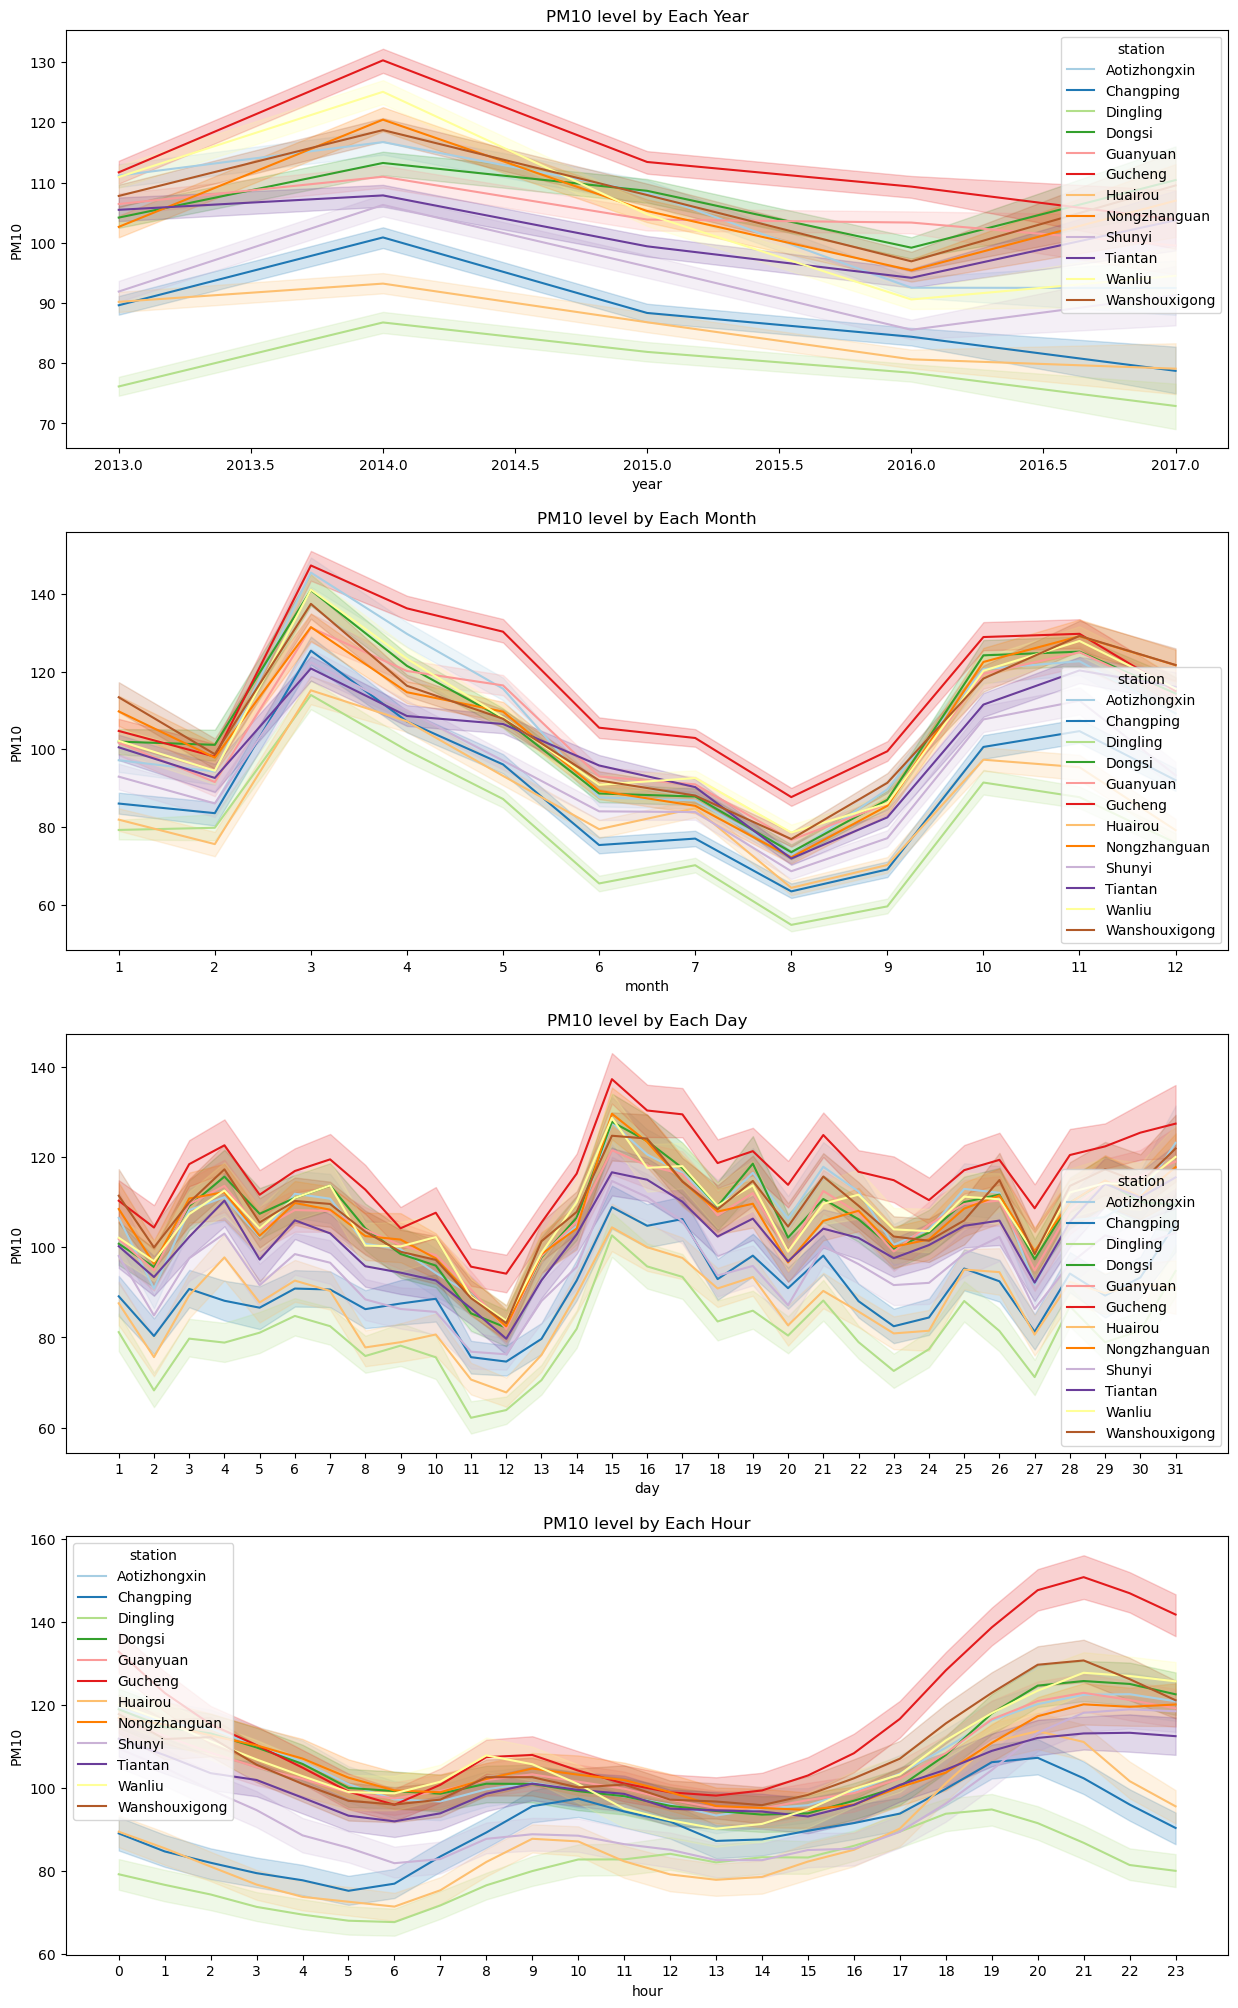

In [21]:
fig,ax = plt.subplots(4,figsize=(15,25))
sns.lineplot(data=filtered_df,y='PM10',x='year',hue='station',palette='Paired',ax=ax[0])
ax[0].set_title('PM10 level by Each Year')
ax[1].set_xticks(range(1,13))
sns.lineplot(data=filtered_df,y='PM10',x='month',hue='station',palette='Paired',ax=ax[1])
ax[1].set_title('PM10 level by Each Month')
sns.lineplot(data=filtered_df,y='PM10',x='day',hue='station',palette='Paired',ax=ax[2])
ax[2].set_title('PM10 level by Each Day')
ax[2].set_xticks(range(1,32))
sns.lineplot(data=filtered_df,y='PM10',x='hour',hue='station',palette='Paired',ax=ax[3])
ax[3].set_title('PM10 level by Each Hour')
ax[3].set_xticks(range(0,24))

### PM2.5

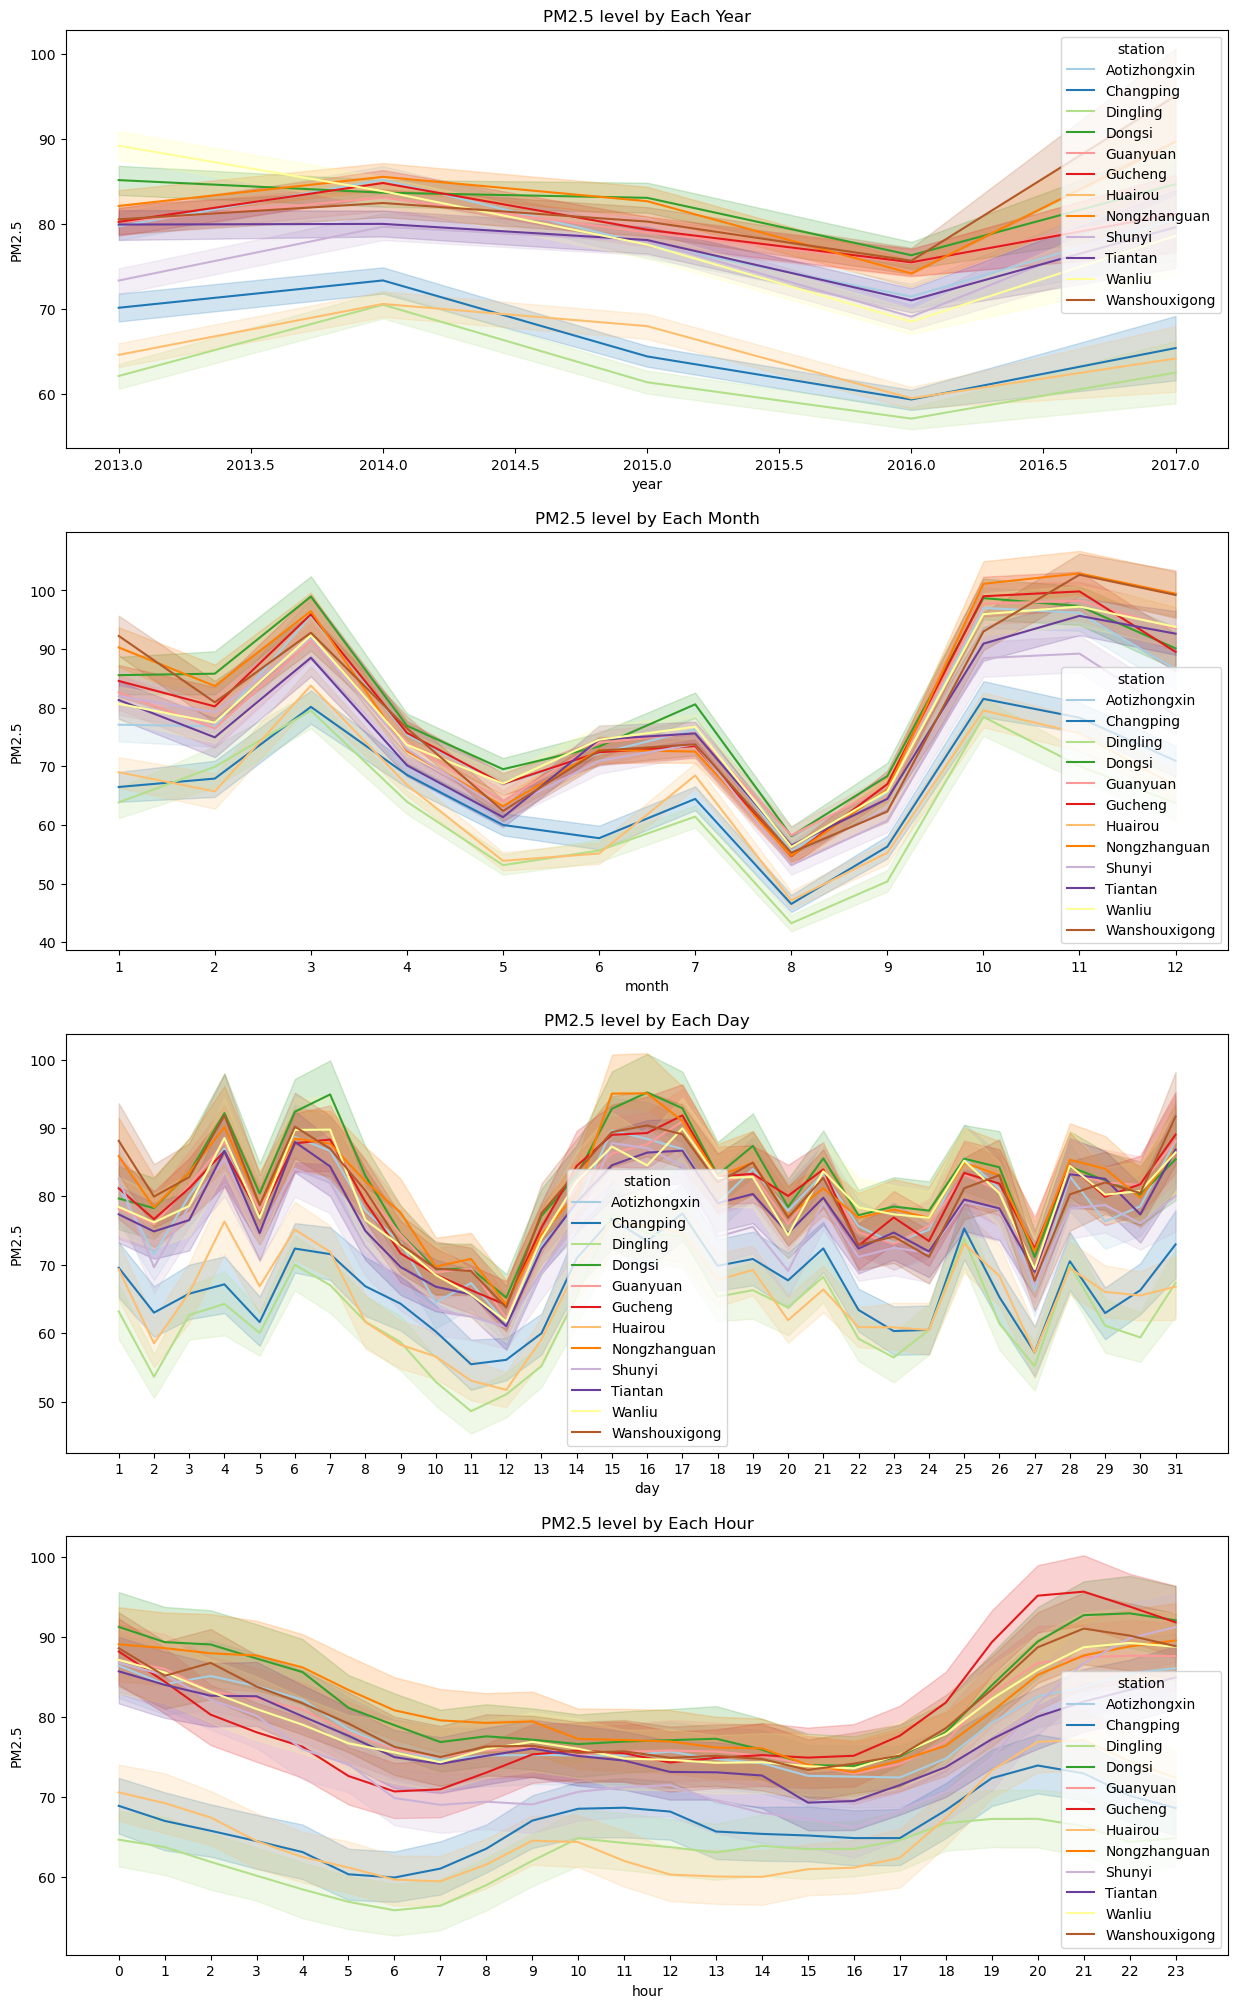

In [22]:
fig,ax = plt.subplots(4,figsize=(15,25))
sns.lineplot(data=filtered_df,y='PM2.5',x='year',hue='station',palette='Paired',ax=ax[0])
ax[0].set_title('PM2.5 level by Each Year')
sns.lineplot(data=filtered_df,y='PM2.5',x='month',hue='station',palette='Paired',ax=ax[1])
ax[1].set_title('PM2.5 level by Each Month')
ax[1].set_xticks(range(1,13))
sns.lineplot(data=filtered_df,y='PM2.5',x='day',hue='station',palette='Paired',ax=ax[2])
ax[2].set_title('PM2.5 level by Each Day')
ax[2].set_xticks(range(1,32))
sns.lineplot(data=filtered_df,y='PM2.5',x='hour',hue='station',palette='Paired',ax=ax[3])
ax[3].set_title('PM2.5 level by Each Hour')
ax[3].set_xticks(range(0,24))

Visualisasi EDA ini menjawab pertanyaan kedua terkait tren kualitas udara. Terlihat rata-rata bahwa PM10 memiliki nilai tertinggi pada tahun 2014 sedangkan PM2.5 memiliki nilai tertinggi pada 2017. Selain itu, bulan-bulan awal dan akhir tahun memiliki nilai PM10 dan PM2.5 tertinggi 

## Seeking conditions of lowest PM10 level

In [23]:
lowest_pm10_conditions=filtered_df.sort_values(by=['PM10'],ascending=False).head(20)
lowest_pm10_conditions

No  year  month  day  hour  PM2.5   PM10      SO2       NO2  \
167160   1883  2013      5   18    10  195.0  757.0  21.9912   41.2653   
16404   17354  2015      2   22     1   49.0  721.0   2.0000    5.0000   
183073  18624  2015      4   15    23   62.0  717.0   2.0000    5.0000   
366004   3417  2013      7   21     8   64.0  707.0   8.0000   62.0000   
361524  33722  2017      1    4     1  548.0  704.0  12.0000  180.0000   
346225  17353  2015      2   22     0   48.0  700.0   5.0000   15.0000   
179903  15360  2014     11   30    23   48.0  699.0   5.0000    5.0000   
264109  35029  2017      2   27    12  126.0  697.0  41.0000   95.0000   
175051  10291  2014      5    3    18   97.0  697.0   2.0000    8.0000   
190286  26401  2016      3    5     0  144.0  689.0   4.0000    9.0000   
247420  17355  2015      2   22     2   85.0  688.0   2.0000    3.0000   
262845  33726  2017      1    4     5  550.0  688.0  11.0000  141.0000   
173851   9071  2014      3   13    22   35.0  686.0   9.0000   13.0000   
361525  33724  2017      1    4     3  560.0  686.0  10.0000  157.0000   
116419  18205  2015      3   29    12  142.0  680.0  43.0000   85.0000   
190287  26403  2016      3    5     2  114.0  680.0   3.0000    8.0000   
262846  33727  2017      1    4     6  548.0  679.0  11.0000  139.0000   
182653  18183  2015      3   28    14   56.0  675.0   3.0000   11.0000   
379953  18202  2015      3   29     9  111.0  672.0  30.0000   98.0000   
157675  26974  2016      3   28    21   65.0  672.0   2.0000   17.0000   

            CO        O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
167160   900.0   62.5464  22.9   999.5  15.5   0.0    S   1.8        Gucheng  
16404    200.0   72.0000  -4.0  1018.0 -26.2   0.0  NNW   4.9   Aotizhongxin  
183073   200.0  101.0000  17.9   998.8  -9.1   0.0    N   3.0        Gucheng  
366004   900.0   53.0000  26.4   999.3  22.7   0.0  SSW   0.7  Wanshouxigong  
361524   900.0    8.0000  -4.4  1019.2  -5.8   0.0    W   0.9         Wanliu  
346225   300.0   52.0000  -2.0  1021.0 -25.3   0.0    N   5.7         Wanliu  
179903   300.0    2.0000  -3.5  1025.0 -27.2   0.0  NNW   2.6        Gucheng  
264109  2400.0   23.0000  12.1  1017.3  -5.4   0.0  SSW   1.2   Nongzhanguan  
175051   200.0   89.0000  17.7  1005.5  -9.3   0.0   NW   2.5        Gucheng  
190286   400.0   64.0000  10.7  1011.3 -10.8   0.0  NNW   4.8        Gucheng  
247420   200.0   69.0000  -3.3  1020.5 -23.1   0.0   NW   7.0   Nongzhanguan  
262845   900.0   12.0000  -4.5  1021.0  -5.5   0.0   NW   0.0   Nongzhanguan  
173851   300.0   83.0000  10.3  1012.1 -17.9   0.0    W   2.4        Gucheng  
361525   900.0    7.0000  -4.4  1019.3  -5.4   0.0  NNE   0.7         Wanliu  
116419  1800.0   61.0000  19.6  1011.3   2.9   0.0   SE   2.8         Dongsi  
190287   400.0   47.0000   9.0  1012.5 -15.5   0.0  NNW   2.8        Gucheng  
262846   900.0   12.0000  -4.8  1020.8  -5.8   0.0  ESE   0.0   Nongzhanguan  
182653   300.0   95.0000  22.8  1004.3   0.0   0.0   NW   3.5        Gucheng  
379953  1600.0    6.0000  14.9  1013.8   2.4   0.0    E   1.2  Wanshouxigong  
157675   400.0   61.0000  19.0  1008.5  -5.2   0.0   NW   4.3       Guanyuan

Text(0.5, 1.0, 'Stations for top 20 lowest level of PM10')

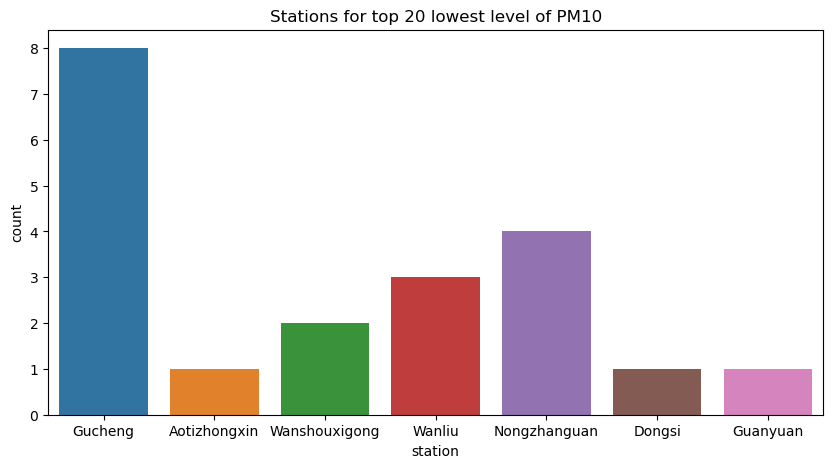

In [24]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x='station',data=lowest_pm10_conditions)
ax.set_title('Stations for top 20 lowest level of PM10')

## Seeking conditions of lowest PM2.5 level

In [25]:
lowest_pm25_conditions=filtered_df.sort_values(by=['PM2.5'],ascending=False).head(20)
lowest_pm25_conditions

No  year  month  day  hour  PM2.5   PM10      SO2       NO2  \
238229   7711  2014      1   16     6  566.0  616.0  85.0000  135.0000   
385403  24127  2015     12    1     6  565.0  565.0  37.0000  142.0000   
332604   2876  2013      6   28    19  560.0  506.0  20.2776   55.4310   
361525  33724  2017      1    4     3  560.0  686.0  10.0000  157.0000   
197200  33742  2017      1    4    21  559.0  597.0  15.0000  237.0000   
386114  24913  2016      1    3     0  558.0  560.0  42.0000  164.0000   
394520  33727  2017      1    4     6  557.0  602.0   9.0000  129.0000   
107030   8427  2014      2   15     2  555.0  553.0  10.0000   47.0000   
262160  32976  2016     12    3    23  554.0  669.0  17.0000  150.0000   
332605   2877  2013      6   28    20  554.0  477.0  18.2784   79.2458   
295906  33726  2017      1    4     5  554.0  554.0  15.0000  183.0000   
394476  33663  2017      1    1    14  552.0  576.0   6.0000  178.0000   
287310  24686  2015     12   24    13  552.0  552.0  19.0000  107.0000   
22679   24140  2015     12    1    19  552.0  588.0  20.0000  158.0000   
22676   24131  2015     12    1    10  552.0  552.0  30.0000  185.0000   
22678   24135  2015     12    1    14  550.0  550.0  29.0000  185.0000   
262845  33726  2017      1    4     5  550.0  688.0  11.0000  141.0000   
353053  24714  2015     12   25    17  549.0  549.0  11.0000  149.0000   
262846  33727  2017      1    4     6  548.0  679.0  11.0000  139.0000   
361524  33722  2017      1    4     1  548.0  704.0  12.0000  180.0000   

            CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
238229  6900.0   8.0  -3.3  1023.2  -6.3   0.0   NE   1.1   Nongzhanguan  
385403  1000.0  13.0  -0.8  1015.9  -1.4   0.0  ESE   0.6  Wanshouxigong  
332604  3200.0  86.0  25.8   994.4  23.3   0.0    N   0.8         Wanliu  
361525   900.0   7.0  -4.4  1019.3  -5.4   0.0  NNE   0.7         Wanliu  
197200   900.0   3.0  -1.5  1019.7  -4.8   0.0   NW   0.4        Gucheng  
386114  6400.0  14.0  -3.2  1017.0  -4.0   0.0  ENE   0.5  Wanshouxigong  
394520  1000.0   8.0  -4.8  1020.8  -5.8   0.0  ESE   0.0  Wanshouxigong  
107030  4900.0  35.0  -5.0  1019.9  -7.4   0.0    E   0.9         Dongsi  
262160  6700.0  11.0   1.3  1013.8  -0.6   0.0  ESE   0.3   Nongzhanguan  
332605  3299.0  45.0  26.2   996.4  22.9   0.0    N   1.6         Wanliu  
295906   800.0   6.0  -4.7  1021.9  -6.1   0.0   NE   0.4         Shunyi  
394476  6300.0  10.0   1.3  1019.3  -3.6   0.0  ESE   1.5  Wanshouxigong  
287310  6200.0  12.0   2.3  1023.8  -3.2   0.0   SE   1.7         Shunyi  
22679    900.0  13.0   0.5  1015.0   0.5   0.0    N   0.5   Aotizhongxin  
22676    900.0  11.0   0.4  1016.0  -0.2   0.0   SE   0.5   Aotizhongxin  
22678    900.0  11.0   0.3  1013.4   0.2   0.0    E   1.2   Aotizhongxin  
262845   900.0  12.0  -4.5  1021.0  -5.5   0.0   NW   0.0   Nongzhanguan  
353053  5900.0   6.0  -2.9  1010.8  -5.1   0.0    W   1.4         Wanliu  
262846   900.0  12.0  -4.8  1020.8  -5.8   0.0  ESE   0.0   Nongzhanguan  
361524   900.0   8.0  -4.4  1019.2  -5.8   0.0    W   0.9         Wanliu

Text(0.5, 1.0, 'Stations for top 20 lowest level of PM2.5')

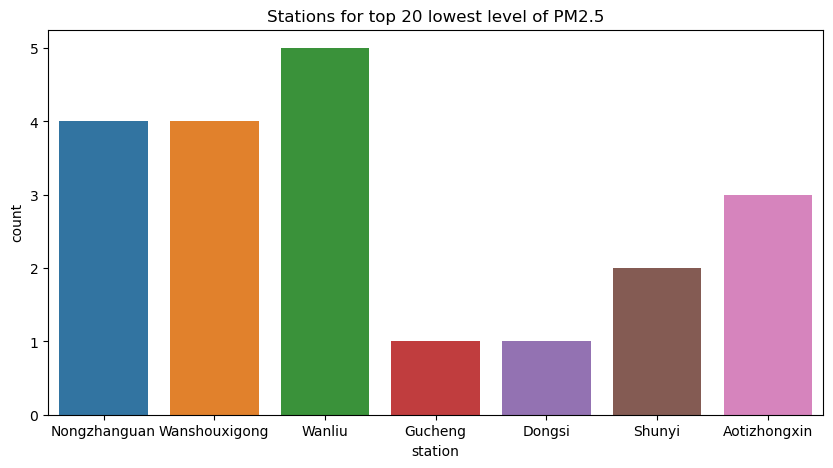

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x='station',data=lowest_pm25_conditions)
ax.set_title('Stations for top 20 lowest level of PM2.5')

Lalu, untuk mengetahui kondisi mana yang memiliki tingkat PM10 dan PM2.5 terendah yang tercatat, EDA ini dapat menjadi informasi untuk topik tersebut. Gucheng akan memiliki salah satu tingkat PM10 terendah sementara Nongzhanguan dan Wanshouxiong beserta Wanliu akan memiliki nilai PM2.5 terendah.

## Kesimpulan
- Apa saja faktor yang mempengaruhi PM2.5 dan PM10?
- Bagaimana waktu mempengaruhi tren kualitas udara?
- Kondisi apa saja yang akan terdapat pada kualitas udara terbaik?
<br><br>
Berdasarkan pertanyaan-pertanyaan tersebut, beberapa faktor mirip seperti CO, NO2, dan SO2 memiliki korelasi positif terhadap tingkat PM10 dan PM2.5, mengarahkan kepada asusmsi nilai PM2.5 dan PM10 dapat dipengaruhi langsung oleh faktor-faktor tersebut. 
<br><br>
Lalu, melihat tren waktu, terdapat kemiripan nilai PM10 dan PM2.5 setiap bulan, hari dan jam. Hanya saja, terdapat kenaikan signifikan pada malam hari untuk kota Gucheng pada nilai PM10 nya.
<br><br>
Terakhir, kondisi yang terdapat pada waktu-waktu PM10 dan PM2.5 bernilai rendah sangat bervariasi. Akan tetapi, beberapa kota memiliki nilai PM2.5 dan PM10 yang lebih rendah. Hal ini juga ditambah dengan pada 20 PM10 ter-rendah terdapat waktu yang menunjukkan kondisi tengah malam. Sedangkan, PM2.5 akan lebih rendah pada kondisi tengah hari hingga sore menurut 20 data dengan nilai PM2.5 ter-rendah.

In [27]:
# # exporting the dataset
# filtered_df.to_csv('dashboard/main_data.csv',index=False)

In [28]:
# # requirements
# !pip freeze > requirements.txt

Louis Widi Anandaputra - 2023